<a href="https://colab.research.google.com/github/Kuroy22/MAT422/blob/main/4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
4.2
Spectral graph bipartitioning

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import scipy.sparse as sparse
import scipy.sparse.linalg as sla

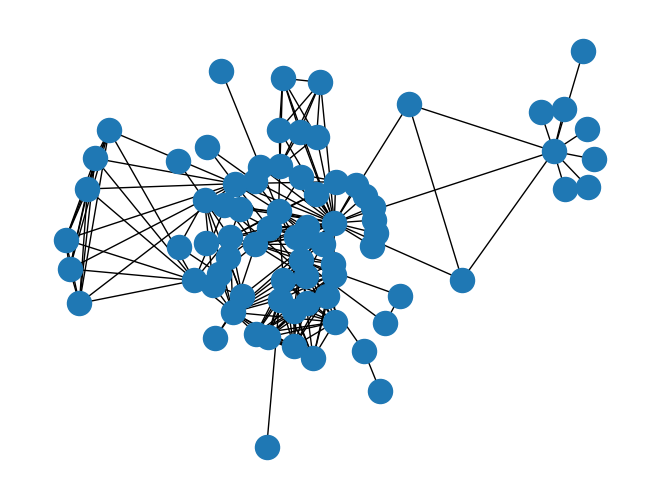

In [9]:
G = nx.les_miserables_graph()
nx.draw_kamada_kawai(G)

In [10]:
G.nodes(data=True)

NodeDataView({'Napoleon': {}, 'Myriel': {}, 'MlleBaptistine': {}, 'MmeMagloire': {}, 'CountessDeLo': {}, 'Geborand': {}, 'Champtercier': {}, 'Cravatte': {}, 'Count': {}, 'OldMan': {}, 'Valjean': {}, 'Labarre': {}, 'Marguerite': {}, 'MmeDeR': {}, 'Isabeau': {}, 'Gervais': {}, 'Listolier': {}, 'Tholomyes': {}, 'Fameuil': {}, 'Blacheville': {}, 'Favourite': {}, 'Dahlia': {}, 'Zephine': {}, 'Fantine': {}, 'MmeThenardier': {}, 'Thenardier': {}, 'Cosette': {}, 'Javert': {}, 'Fauchelevent': {}, 'Bamatabois': {}, 'Perpetue': {}, 'Simplice': {}, 'Scaufflaire': {}, 'Woman1': {}, 'Judge': {}, 'Champmathieu': {}, 'Brevet': {}, 'Chenildieu': {}, 'Cochepaille': {}, 'Pontmercy': {}, 'Boulatruelle': {}, 'Eponine': {}, 'Anzelma': {}, 'Woman2': {}, 'MotherInnocent': {}, 'Gribier': {}, 'MmeBurgon': {}, 'Jondrette': {}, 'Gavroche': {}, 'Gillenormand': {}, 'Magnon': {}, 'MlleGillenormand': {}, 'MmePontmercy': {}, 'MlleVaubois': {}, 'LtGillenormand': {}, 'Marius': {}, 'BaronessT': {}, 'Mabeuf': {}, 'Enjolra

In [11]:
A = nx.adjacency_matrix(G)
A

<77x77 sparse array of type '<class 'numpy.int64'>'
	with 508 stored elements in Compressed Sparse Row format>

In [12]:
n = A.shape[0]
d = A.sum(axis=1).reshape(1,-1) # compute degrees
Dinv = sparse.dia_matrix((1 / d, 0), shape=(n, n))
Dinv

<77x77 sparse matrix of type '<class 'numpy.float64'>'
	with 77 stored elements (1 diagonals) in DIAgonal format>

In [13]:
# works on square matrices or vectors
Onefun = lambda X : np.mean(X, axis=0).reshape(1,-1).repeat(X.shape[0], axis=0)

m = A.shape[0] # linear operator of shape of Adjacency matrix

OneOneT = sla.LinearOperator(
    shape   = (m,m),
    matvec  = Onefun,
    rmatvec = Onefun
)

In [14]:
alpha = 0.1

P = (1 - alpha) * sla.aslinearoperator(A @ Dinv) + alpha * OneOneT

lam, V = sla.eigs(P, k=5, which='LM')
lam

array([1.        +0.j, 0.83936036+0.j, 0.79746166+0.j, 0.74936377+0.j,
       0.70144813+0.j])

In [15]:
1j**2 == -1

True

In [16]:
x = np.abs(np.real(V[:,0])) # PageRank Vector
x

array([0.0133386 , 0.20399851, 0.0949893 , 0.10668613, 0.0133386 ,
       0.0133386 , 0.0133386 , 0.0133386 , 0.01926114, 0.0133386 ,
       0.57767244, 0.0107066 , 0.01679025, 0.0107066 , 0.0107066 ,
       0.0107066 , 0.07701289, 0.08277018, 0.07701289, 0.07992839,
       0.08300515, 0.08007966, 0.07716337, 0.15885074, 0.11720935,
       0.20909641, 0.22214954, 0.1583424 , 0.06719718, 0.04831427,
       0.01895798, 0.0377782 , 0.0107066 , 0.01702923, 0.06181196,
       0.06181196, 0.05030959, 0.05030959, 0.05030959, 0.02101082,
       0.01050109, 0.06584516, 0.02292668, 0.02325998, 0.02366606,
       0.0160557 , 0.02666986, 0.01541702, 0.1673304 , 0.104165  ,
       0.01375137, 0.09145499, 0.01729798, 0.01099474, 0.02347196,
       0.31496208, 0.0133744 , 0.05356893, 0.23233548, 0.16932592,
       0.05145195, 0.09653403, 0.21000629, 0.10143451, 0.16574335,
       0.1099175 , 0.04528474, 0.01645582, 0.08526568, 0.09150015,
       0.06900207, 0.04435378, 0.01961912, 0.02781421, 0.02781

In [17]:
i = np.argmax(x)
names = np.array([k for k, _ in G.nodes(data=True)])
names[i]

'Valjean'

In [18]:
perm = np.argsort(x)[::-1] # reverse sort
names[perm[:4]]

array(['Valjean', 'Marius', 'Enjolras', 'Cosette'], dtype='<U16')